In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
len(y_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

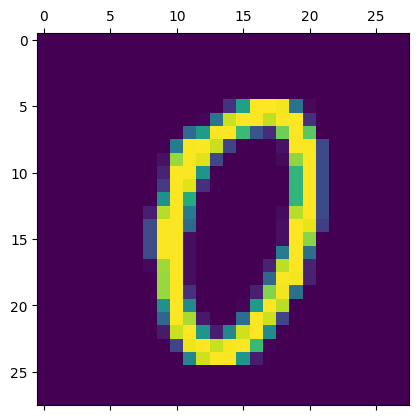

In [ ]:
plt.matshow(X_train[1000])

In [ ]:
y_train[1000]

0

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train=X_train/255
X_test=X_test/255
#to scal the data to get the good accuracy

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened.shape

(10000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#adam: The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient.

model.fit(X_train_flattened,y_train,epochs=5)
#epochs : numbers of iteration your neural network is going to run

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4681 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2737 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9259


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.9224


[0.27330300211906433, 0.9223999977111816]

In [ ]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([3.2238055e-02, 3.9419231e-07, 4.7800917e-02, 9.5604849e-01,
       1.5941331e-03, 7.8759968e-02, 1.5159749e-06, 9.9977934e-01,
       8.4432207e-02, 7.2816408e-01], dtype=float32)

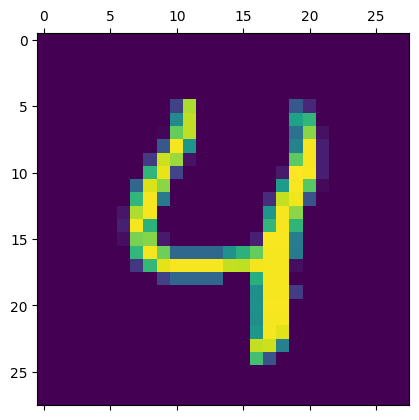

In [ ]:
plt.matshow(X_test[4])


In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [  12,   13,  915,   10,    6,    2,   14,   11,   44,    5],
       [   5,    0,   23,  912,    0,   22,    4,   12,   21,   11],
       [   1,    1,    3,    1,  881,    0,   16,    6,   10,   63],
       [  12,    3,    3,   34,    6,  753,   21,   10,   42,    8],
       [  11,    3,    4,    1,    7,    8,  920,    2,    2,    0],
       [   1,    9,   22,    3,    2,    0,    0,  952,    2,   37],
       [  12,   12,    5,   17,    8,   19,   11,   11,  870,    9],
       [  12,    7,    1,    7,   11,    5,    0,   20,    6,  940]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

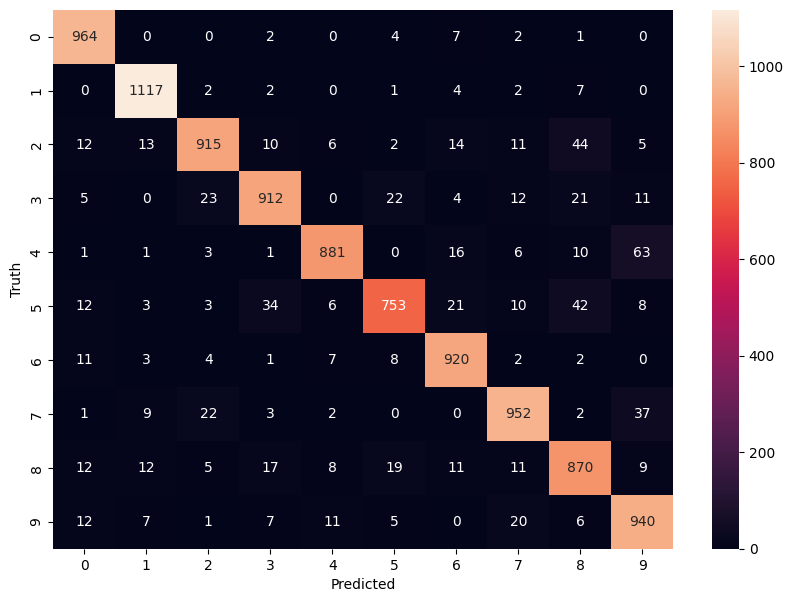

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Using Hidden Layer**

In [ ]:
#here i took 200 hidden layers we can take any number and in the second line 10 is shape of output
model=keras.Sequential([
    keras.layers.Dense(200,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2344 - accuracy: 0.9325
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0960 - accuracy: 0.9709
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0649 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0479 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0351 - accuracy: 0.9889


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9767


[0.07633710652589798, 0.9767000079154968]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

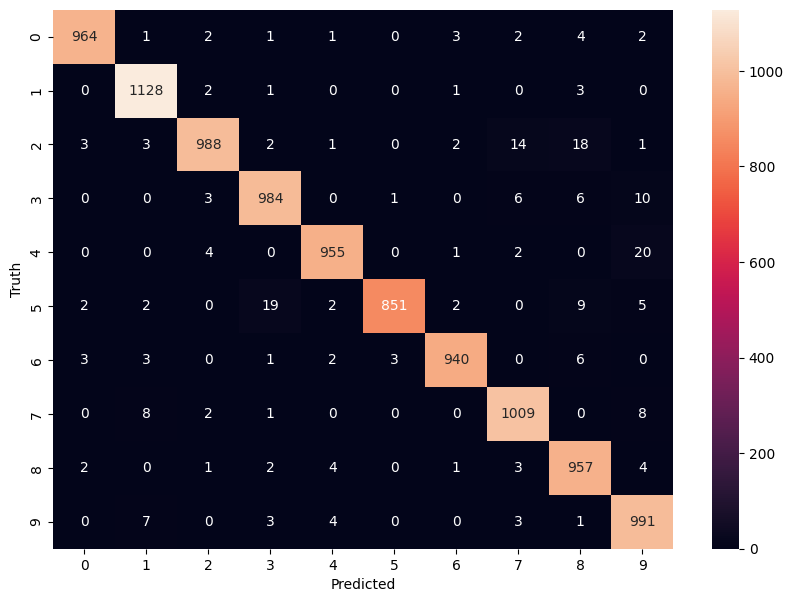

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2378 - accuracy: 0.9319
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0999 - accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0665 - accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0500 - accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0374 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0169 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0158 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0829 - accuracy: 0.9786


[0.08291391283273697, 0.978600025177002]

In [ ]:
y_predictedd=model.predict(X_test)
y_predictedd[0]

313/313 [==============================] - 1s 2ms/step


array([8.0901980e-03, 1.2494026e-08, 5.4068595e-02, 8.8184178e-01,
       8.3053203e-10, 4.1735248e-06, 2.0209042e-14, 1.0000000e+00,
       7.8775611e-04, 3.7297684e-01], dtype=float32)

In [ ]:
np.argmax(y_predictedd[0])

7

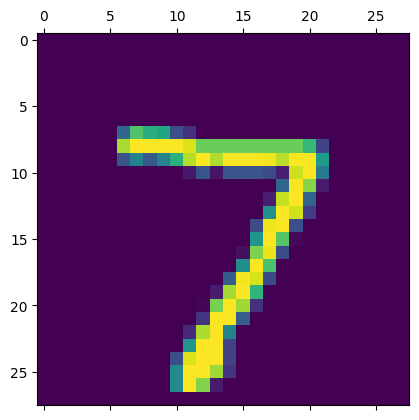

In [ ]:
plt.matshow(X_test[0])